In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks
import os
import csv
import datetime
from glob import glob


#read files           
eda_value =pd.read_csv(r"C:\Users\anilp\Project_Files\1699449460_A044DF\EDA.csv", skiprows=1)
bvp_value =pd.read_csv("C:/Users/anilp/Project_Files/1697435524_A044DF/BVP.csv", skiprows=1)
   
df_eda = eda_value.rename(columns = {'4.000000' : 'EDA'})
df_bvp = bvp_value.rename(columns = {'64.000000' : 'BVP'})

# Display the dataframes
print("DataFrame for EDA:")
print(df_eda)

print("\nDataFrame for BVP:")
print(df_bvp)

DataFrame for EDA:
            EDA
0      0.000000
1      0.833996
2      1.181441
3      1.619646
4      2.097595
...         ...
20869  6.450580
20870  6.697832
20871  6.995047
20872  7.283989
20873  7.208405

[20874 rows x 1 columns]

DataFrame for BVP:
           BVP
0        -0.00
1        -0.00
2        -0.00
3        -0.00
4        -0.00
...        ...
705832 -322.03
705833 -343.35
705834 -361.17
705835 -374.98
705836 -385.06

[705837 rows x 1 columns]


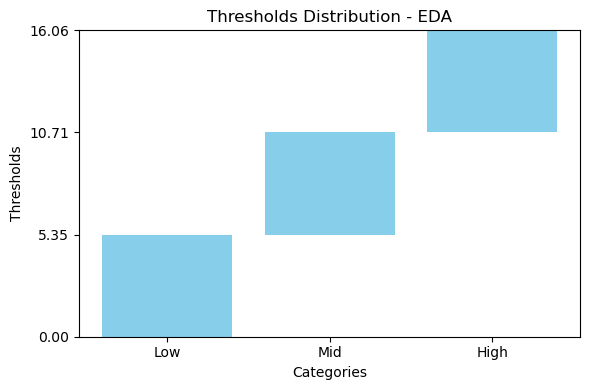

In [4]:
# Define category labels
category_labels = ['Low', 'Mid', 'High']

eda_min = df_eda['EDA'].min()
eda_max = df_eda['EDA'].max()

# Define the category thresholds
num_categories = 3
thresholds = [eda_min]
thresholds.extend([eda_min + (i + 1) * ((eda_max - eda_min) / num_categories) for i in range(num_categories - 1)])
thresholds.append(eda_max)

# Create bar plots for EDA with threshold lines
plt.figure(figsize=(6, 4))

plt.bar(category_labels, [thresholds[i + 1] - thresholds[i] for i in range(num_categories)],
        bottom=thresholds[:-1], color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Thresholds')
plt.title('Thresholds Distribution - EDA')
plt.ylim(eda_min, eda_max)
plt.yticks(thresholds)

plt.tight_layout()
plt.show()

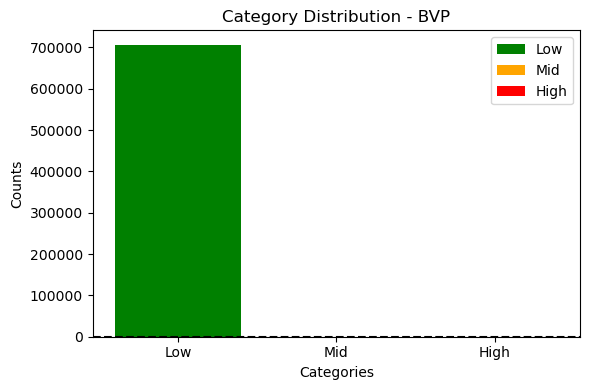

In [4]:
# Calculate the min and max values from 'BVP' dataframe
low_threshold = df_bvp['BVP'].min()
high_threshold = df_bvp['BVP'].max()


# Categorize the values into low, mid, and high
low_values = df_bvp[(df_bvp['BVP'] >= low_threshold) & (df_bvp['BVP'] < high_threshold)]['BVP']
mid_values = df_bvp[(df_bvp['BVP'] >= -high_threshold) & (df_bvp['BVP'] < low_threshold)]['BVP']
high_values = df_bvp[(df_bvp['BVP'] <= -high_threshold) | (df_bvp['BVP'] >= high_threshold)]['BVP']

# Calculate the count of values in each category
low_count = len(low_values)
mid_count = len(mid_values)
high_count = len(high_values)

# Create bar plots for BVP with threshold line
plt.figure(figsize=(6, 4))

plt.bar(['Low'], [low_count], color='green', label='Low')
plt.bar(['Mid'], [mid_count], color='orange', label='Mid')
plt.bar(['High'], [high_count], color='red', label='High')
plt.axhline(0, color='black', linestyle='--')  # Adding a horizontal line at y = 0

plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Category Distribution - BVP')
plt.legend()

plt.tight_layout()
plt.show()